<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">  

<b> <font size='5'>  
ELEC PRICE PREDICTION CAPSTONE:</font>  

<font size='4'>Electricity Load Forecasts DataFrame Creation Notebook  
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; (Down-sampled to hourly)
</font> </b>

<font size='3'>  
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Manu Kalia Project Submission<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; DSI-7-SF<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 15-May-2019<br>
</font>

---


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#7-Day-Ahead-Demand-Forecast-DataFrame" data-toc-modified-id="7-Day-Ahead-Demand-Forecast-DataFrame-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>7-Day-Ahead Demand Forecast DataFrame</a></span></li><li><span><a href="#2-Day-Ahead-Demand-Forecast-DataFrame" data-toc-modified-id="2-Day-Ahead-Demand-Forecast-DataFrame-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2-Day-Ahead Demand Forecast DataFrame</a></span></li><li><span><a href="#Day-Ahead-Demand-Forecast-DataFrame" data-toc-modified-id="Day-Ahead-Demand-Forecast-DataFrame-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Day-Ahead Demand Forecast DataFrame</a></span></li><li><span><a href="#RTM-DataFrame" data-toc-modified-id="RTM-DataFrame-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>RTM DataFrame</a></span></li><li><span><a href="#Join-Forecasts-Into-a-Single-DataFrame" data-toc-modified-id="Join-Forecasts-Into-a-Single-DataFrame-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Join Forecasts Into a Single DataFrame</a></span></li></ul></div>

---

## Imports

In [1]:
import pandas as pd
import numpy as np

import wget, os
import time
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
sns.set_style('whitegrid')

---

## 7-Day-Ahead Demand Forecast DataFrame

In [3]:
sev_da_load_orig_cols=['INTERVALSTARTTIME_GMT',
                       'OPR_DT',
                       'OPR_HR',
                       'TAC_AREA_NAME',
                       'MW']

sev_da_load_new_cols =['start_datetime',
                       'date',
                       'hr_index',
                       'area',
                       '7da_load_fcast_mw']

sev_da_load_rename_dict = {old: new for old, new in zip(sev_da_load_orig_cols,
                                                        sev_da_load_new_cols)}

In [4]:
sev_da_load_df = pd.DataFrame(columns=sev_da_load_new_cols)

for file in glob.glob('../unzipped_caiso/unzipped_caiso_7da_load/*.csv'):
    df = pd.read_csv(file, usecols=sev_da_load_orig_cols).rename(index=str,
                                                         columns=sev_da_load_rename_dict)
    df = df[df.area == 'CA ISO-TAC']
    sev_da_load_df = sev_da_load_df.append(df, ignore_index=True)

In [5]:
sev_da_load_df.shape

(29072, 5)

In [6]:
sev_da_load_df = sev_da_load_df.sort_values(by='start_datetime').reset_index(drop=True)

sev_da_load_df['start_datetime'] = pd.to_datetime(sev_da_load_df['start_datetime'])

sev_da_load_df.set_index('start_datetime', inplace=True)
sev_da_load_df.sort_index(inplace=True)
sev_da_load_df.head()

,date,hr_index,area,7da_load_fcast_mw
start_datetime,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,CA ISO-TAC,22232.26
2016-01-01 09:00:00+00:00,2016-01-01,2,CA ISO-TAC,21515.00
2016-01-01 10:00:00+00:00,2016-01-01,3,CA ISO-TAC,20854.85
2016-01-01 11:00:00+00:00,2016-01-01,4,CA ISO-TAC,20495.68
2016-01-01 12:00:00+00:00,2016-01-01,5,CA ISO-TAC,20490.69


In [7]:
sev_da_load_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29072 entries, 2016-01-01 08:00:00+00:00 to 2019-05-01 06:00:00+00:00
Data columns (total 4 columns):
date                 29072 non-null object
hr_index             29072 non-null object
area                 29072 non-null object
7da_load_fcast_mw    29072 non-null float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


---

## 2-Day-Ahead Demand Forecast DataFrame

In [8]:
two_da_load_orig_cols=['INTERVALSTARTTIME_GMT',
                       'OPR_DT',
                       'OPR_HR',
                       'TAC_AREA_NAME',
                       'MW']

two_da_load_new_cols =['start_datetime',
                       'date',
                       'hr_index',
                       'area',
                       '2da_load_fcast_mw']

two_da_load_rename_dict = {old: new for old, new in zip(two_da_load_orig_cols,
                                                        two_da_load_new_cols)}

In [9]:
two_da_load_df = pd.DataFrame(columns=two_da_load_new_cols)

for file in glob.glob('../unzipped_caiso/unzipped_caiso_2da_load/*.csv'):
    df = pd.read_csv(file, usecols=two_da_load_orig_cols).rename(index=str,
                                                         columns=two_da_load_rename_dict)
    df = df[df.area == 'CA ISO-TAC']
    two_da_load_df = two_da_load_df.append(df, ignore_index=True)

In [10]:
two_da_load_df.shape

(29144, 5)

In [11]:
two_da_load_df = two_da_load_df.sort_values(by='start_datetime').reset_index(drop=True)

two_da_load_df['start_datetime'] = pd.to_datetime(two_da_load_df['start_datetime'])

two_da_load_df.set_index('start_datetime', inplace=True)
two_da_load_df.sort_index(inplace=True)
two_da_load_df.head()

,date,hr_index,area,2da_load_fcast_mw
start_datetime,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,CA ISO-TAC,22872.01
2016-01-01 09:00:00+00:00,2016-01-01,2,CA ISO-TAC,22070.77
2016-01-01 10:00:00+00:00,2016-01-01,3,CA ISO-TAC,21419.40
2016-01-01 11:00:00+00:00,2016-01-01,4,CA ISO-TAC,20997.22
2016-01-01 12:00:00+00:00,2016-01-01,5,CA ISO-TAC,21008.41


In [7]:
two_da_load_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29072 entries, 2016-01-01 08:00:00+00:00 to 2019-05-01 06:00:00+00:00
Data columns (total 4 columns):
date                 29072 non-null object
hr_index             29072 non-null object
area                 29072 non-null object
7da_load_fcast_mw    29072 non-null float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


---

## Day-Ahead Demand Forecast DataFrame

In [12]:
dam_load_orig_cols=['INTERVALSTARTTIME_GMT',
                    'OPR_DT',
                    'OPR_HR',
                    'TAC_AREA_NAME',
                    'MW']

dam_load_new_cols =['start_datetime',
                    'date',
                    'hr_index',
                    'area',
                    'dam_load_fcast_mw']

dam_load_rename_dict = {old: new for old, new in zip(dam_load_orig_cols,
                                                     dam_load_new_cols)}

In [13]:
dam_load_df = pd.DataFrame(columns=dam_load_new_cols)

for file in glob.glob('../unzipped_caiso/unzipped_caiso_dam_load/*.csv'):
    df = pd.read_csv(file, usecols=dam_load_orig_cols).rename(index=str,
                                                         columns=dam_load_rename_dict)
    df = df[df.area == 'CA ISO-TAC']
    dam_load_df = dam_load_df.append(df, ignore_index=True)

In [14]:
dam_load_df.shape

(29144, 5)

In [15]:
dam_load_df = dam_load_df.sort_values(by='start_datetime').reset_index(drop=True)

dam_load_df['start_datetime'] = pd.to_datetime(dam_load_df['start_datetime'])

dam_load_df.set_index('start_datetime', inplace=True)
dam_load_df.sort_index(inplace=True)
dam_load_df.head()

,date,hr_index,area,dam_load_fcast_mw
start_datetime,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,CA ISO-TAC,23018.64
2016-01-01 09:00:00+00:00,2016-01-01,2,CA ISO-TAC,22188.26
2016-01-01 10:00:00+00:00,2016-01-01,3,CA ISO-TAC,21581.45
2016-01-01 11:00:00+00:00,2016-01-01,4,CA ISO-TAC,21261.00
2016-01-01 12:00:00+00:00,2016-01-01,5,CA ISO-TAC,21289.56


In [16]:
dam_load_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29144 entries, 2016-01-01 08:00:00+00:00 to 2019-05-01 06:00:00+00:00
Data columns (total 4 columns):
date                 29144 non-null object
hr_index             29144 non-null object
area                 29144 non-null object
dam_load_fcast_mw    29144 non-null float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


---

## RTM DataFrame
(realtime spot prices, 5-minute realtime settlements only)

In [17]:
rtm_load_orig_cols=['INTERVALSTARTTIME_GMT',
                    'OPR_DT',
                    'OPR_HR',
                    'TAC_AREA_NAME',
                    'MW']

rtm_load_new_cols =['start_datetime',
                    'date',
                    'hr_index',
                    'area',
                    'rtm_load_fcast_mw']

rtm_load_rename_dict = {old: new for old, new in zip(rtm_load_orig_cols,
                                                     rtm_load_new_cols)}

In [18]:
rtm_load_df = pd.DataFrame(columns=rtm_load_new_cols)

for file in glob.glob('../unzipped_caiso/unzipped_caiso_rtm_load/*.csv'):
    df = pd.read_csv(file, usecols=rtm_load_orig_cols).rename(index=str,
                                                          columns=rtm_load_rename_dict)
    df = df[df.area == 'CA ISO-TAC']
    rtm_load_df = rtm_load_df.append(df, ignore_index=True)

In [19]:
rtm_load_df.shape

(464532, 5)

In [20]:
rtm_load_df = rtm_load_df.sort_values(by='start_datetime').reset_index(drop=True)

rtm_load_df['start_datetime'] = pd.to_datetime(rtm_load_df['start_datetime'])

rtm_load_df.set_index('start_datetime', inplace=True)
rtm_load_df.sort_index(inplace=True)
rtm_load_df.head()

,date,hr_index,area,rtm_load_fcast_mw
start_datetime,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,CA ISO-TAC,22529.0
2016-01-01 08:00:00+00:00,2016-01-01,1,CA ISO-TAC,22626.0
2016-01-01 08:05:00+00:00,2016-01-01,1,CA ISO-TAC,22480.0
2016-01-01 08:10:00+00:00,2016-01-01,1,CA ISO-TAC,22445.0
2016-01-01 08:15:00+00:00,2016-01-01,1,CA ISO-TAC,22390.0


In [21]:
rtm_load_df = rtm_load_df.resample('H').mean()

In [22]:
rtm_load_df.head()

,rtm_load_fcast_mw
start_datetime,
2016-01-01 08:00:00+00:00,22179.0000
2016-01-01 09:00:00+00:00,21331.6250
2016-01-01 10:00:00+00:00,20648.3125
2016-01-01 11:00:00+00:00,20389.0000
2016-01-01 12:00:00+00:00,20443.8125


In [23]:
rtm_load_df.shape

(29183, 1)

---

## Join Forecasts Into a Single DataFrame

In [26]:
elec_demand_hrly = sev_da_load_df.drop(columns=['area'])
elec_demand_hrly.shape

(29072, 3)

In [28]:
elec_demand_hrly = elec_demand_hrly.merge(two_da_load_df[['2da_load_fcast_mw']],
                              how='outer',
                              left_index = True,
                              right_index = True)
elec_demand_hrly.shape

(29144, 4)

In [30]:
elec_demand_hrly = elec_demand_hrly.merge(dam_load_df[['dam_load_fcast_mw']],
                              how='outer',
                              left_index = True,
                              right_index = True)
elec_demand_hrly.shape

(29144, 5)

In [31]:
elec_demand_hrly = elec_demand_hrly.merge(rtm_load_df[['rtm_load_fcast_mw']],
                              how='outer',
                              left_index = True,
                              right_index = True)
elec_demand_hrly.shape

(29183, 6)

In [32]:
elec_demand_hrly.head(10)

,date,hr_index,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw
start_datetime,,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,22232.26,22872.01,23018.64,22179.0000
2016-01-01 09:00:00+00:00,2016-01-01,2,21515.00,22070.77,22188.26,21331.6250
2016-01-01 10:00:00+00:00,2016-01-01,3,20854.85,21419.40,21581.45,20648.3125
2016-01-01 11:00:00+00:00,2016-01-01,4,20495.68,20997.22,21261.00,20389.0000
2016-01-01 12:00:00+00:00,2016-01-01,5,20490.69,21008.41,21289.56,20443.8125
2016-01-01 13:00:00+00:00,2016-01-01,6,20950.76,21464.04,21823.54,20868.1250
2016-01-01 14:00:00+00:00,2016-01-01,7,21525.58,21835.97,22550.65,21567.0000
2016-01-01 15:00:00+00:00,2016-01-01,8,21422.95,21704.51,22546.23,21647.6250
2016-01-01 16:00:00+00:00,2016-01-01,9,21454.57,21719.15,22482.49,21809.3125


In [33]:
elec_demand_hrly.isna().sum()

date                 111
hr_index             111
7da_load_fcast_mw    111
2da_load_fcast_mw     39
dam_load_fcast_mw     39
rtm_load_fcast_mw     43
dtype: int64

In [37]:
elec_demand_hrly = elec_demand_hrly.dropna()
elec_demand_hrly.shape

(29068, 6)

In [38]:
elec_demand_hrly.isna().sum()

date                 0
hr_index             0
7da_load_fcast_mw    0
2da_load_fcast_mw    0
dam_load_fcast_mw    0
rtm_load_fcast_mw    0
dtype: int64

In [39]:
# elec_demand_hrly.to_csv('../data/elec_demand_hrly.csv')

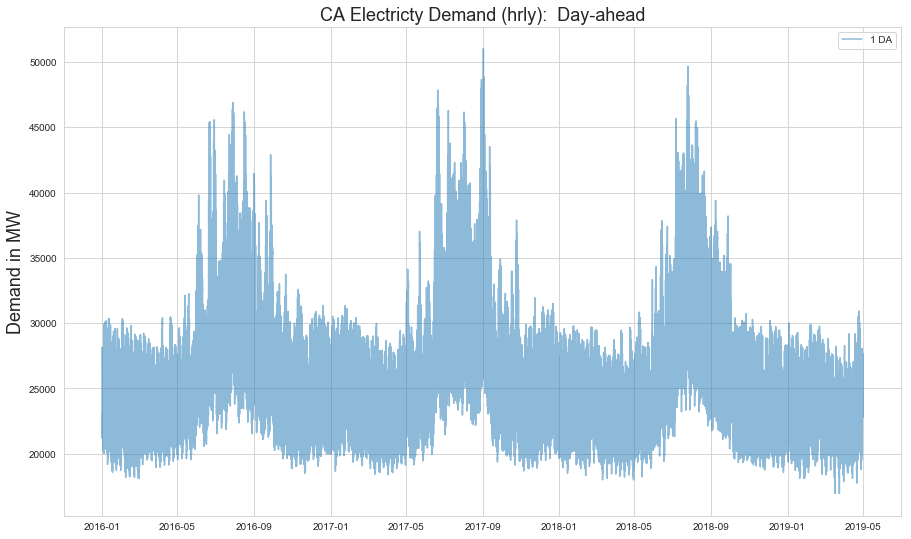

In [48]:
plt.figure(figsize=(15,9))
plt.title('CA Electricty Demand (hrly):  Day-ahead', fontsize=18)

# plt.plot(elec_demand_hrly.index,
#          elec_demand_hrly['7da_load_fcast_mw'],
#          label = '7 DA', alpha=0.5)

# plt.plot(elec_demand_hrly.index,
#          elec_demand_hrly['2da_load_fcast_mw'],
#          label= '2 DA', alpha=0.2)

plt.plot(elec_demand_hrly.index,
         elec_demand_hrly['dam_load_fcast_mw'],
         label = '1 DA', alpha=0.5)

# plt.plot(elec_demand_hrly.index,
#          elec_demand_hrly['rtm_load_fcast_mw'],
#          label = 'Realtime', alpha=0.2)

plt.ylabel('Demand in MW', fontsize=18)
plt.legend()
# plt.savefig('../images/elec_demand_hrly.jpg', bbox_inches='tight')
plt.show();